In [103]:
import sympy as sym
import numpy as np
import scipy as sp
from scipy import linalg, spatial

import matplotlib.pyplot as plt

In [104]:
# podatki
A = 100 # mm^2
ρ = 7.85e-12 # ton/mm^3
E = 2.0e5 # MPa
L0 = 1000 # mm

In [105]:
# masna matrika
def M_e(A, L, ρ):

    M = ρ*A*L/6*np.array([
    [2, 0, 1, 0],
    [0, 2, 0, 1],
    [1, 0, 2, 0],
    [0, 1, 0, 2]])
    
    return M
# togostna matrika
def K_e(A, E, L, α):

    c = np.cos(α)
    s = np.sin(α)
    
    K = A*E/L*np.array([
    [ c**2,   s*c, -c**2,  -s*c],
    [  s*c,  s**2,  -s*c, -s**2],
    [-c**2,  -s*c,  c**2,   s*c],
    [ -c*s, -s**2,   s*c,  s**2]])
    
    return K

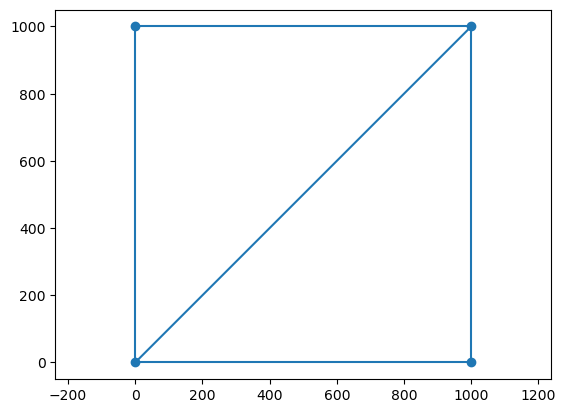

In [106]:
# seznam koordinat vozlišč
vozlisca = np.array([[0,0],[L0,0],[0,L0],[L0,L0]])
# seznam parov indeksov vozlišč
elementi = np.array([[0,1],[1,3],[3,2],[2,0],[0,3]])



# vozlisca[elementi[0]]
[plt.plot(vozlisca[e,0],vozlisca[e,1],c='C0') for e in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],"o",c='C0')
plt.axis('equal');

In [107]:
# sestav globalne masne in togostne matrike
M_glob = np.zeros((vozlisca.size,vozlisca.size))
K_glob = np.zeros((vozlisca.size,vozlisca.size))

for element in elementi:
    # dolžina elementa
    #Le = np.linalg.norm(vozlisca[element[0]] - vozlisca[element[1]])
    Le = sp.spatial.distance.euclidean(vozlisca[element[0]], vozlisca[element[1]])
    
    # kot zasuka
    αe = np.arctan2(np.diff(vozlisca[element,1]) , np.diff(vozlisca[element,0]))[0]
    
    # indeksi prostostnih stopenj
    ind = np.array([2*element[0],2*element[0]+1,2*element[1],2*element[1]+1])
    
    # priševanje prispevkov posameznih elementov
    M_glob[ind[:,None],ind] += M_e(A, Le, ρ)
    K_glob[ind[:,None],ind] += K_e(A, E, Le, αe)
M_glob.shape

(8, 8)

In [108]:
C = np.array([
    #0 1 2 3 4 5 6 7
    [1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0]
])

L = np.block(sym.Matrix(C).nullspace()).astype(int) 

M_glob_c = L.T @ M_glob @ L
K_glob_c = L.T @ K_glob @ L

In [109]:
eig_val, eig_vec = sp.linalg.eig(K_glob_c, M_glob_c)

ind = np.argsort(np.abs(eig_val))
eig_val = np.abs(eig_val[ind])
eig_vec = eig_vec[:,ind]

In [110]:
eig_vec_U = L @ eig_vec
eig_val_U = L @ eig_val

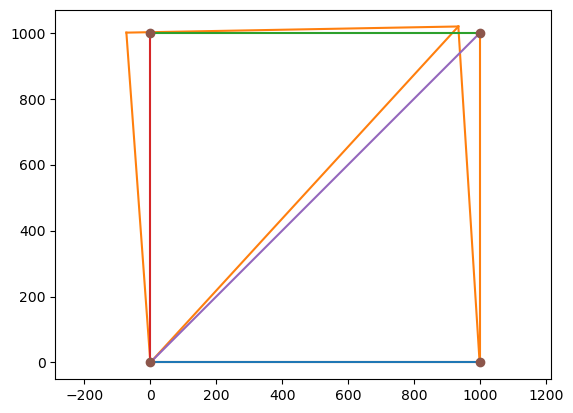

In [111]:
scal = 100

[plt.plot(vozlisca[e,0]+eig_vec_U[2*e,0]*scal,vozlisca[e,1]+eig_vec_U[2*e+1,0]*scal,c='C1') for e in elementi]
[plt.plot(vozlisca[e,0],vozlisca[e,1]) for e in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],"o")
plt.axis('equal');

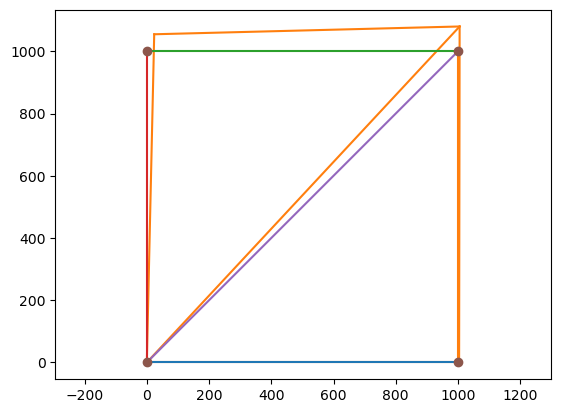

In [112]:
[plt.plot(vozlisca[e,0]+eig_vec_U[2*e,1]*scal,vozlisca[e,1]+eig_vec_U[2*e+1,1]*scal,c='C1') for e in elementi]
[plt.plot(vozlisca[e,0],vozlisca[e,1]) for e in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],"o")
plt.axis('equal');

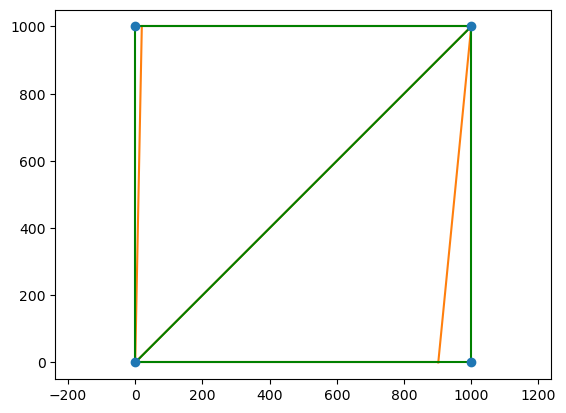

In [113]:
[plt.plot(vozlisca[e,0]+eig_vec_U[2*e,2]*scal,vozlisca[e,1]+eig_vec_U[2*e+1,2]*scal,c='C1') for e in elementi]
[plt.plot(vozlisca[e,0],vozlisca[e,1],c='green') for e in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],"o",c='C0')
plt.axis('equal');

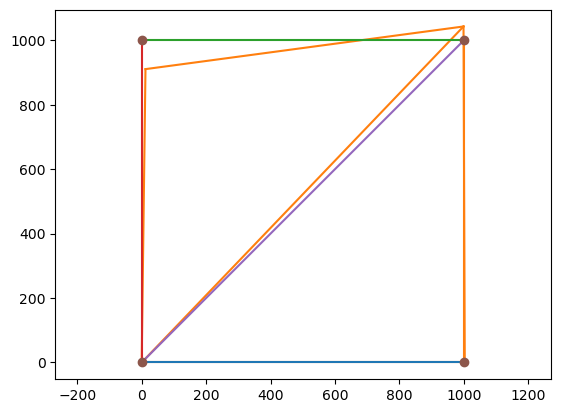

In [114]:
[plt.plot(vozlisca[e,0]+eig_vec_U[2*e,3]*scal,vozlisca[e,1]+eig_vec_U[2*e+1,3]*scal,c='C1') for e in elementi]
[plt.plot(vozlisca[e,0],vozlisca[e,1]) for e in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],"o")
plt.axis('equal');

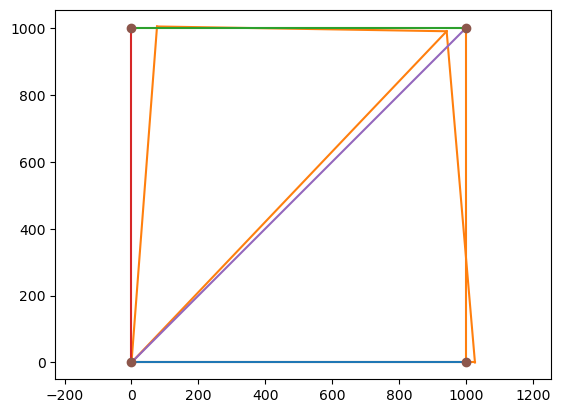

In [115]:
[plt.plot(vozlisca[e,0]+eig_vec_U[2*e,4]*scal,vozlisca[e,1]+eig_vec_U[2*e+1,4]*scal,c='C1') for e in elementi]
[plt.plot(vozlisca[e,0],vozlisca[e,1]) for e in elementi]
plt.plot(vozlisca[:,0],vozlisca[:,1],"o")
plt.axis('equal');